In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("health.csv")

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
369,1,133,102,28,140,32.8,0.234,45,1
592,3,132,80,0,0,34.4,0.402,44,1
396,3,96,56,34,115,24.7,0.944,39,0
511,0,139,62,17,210,22.1,0.207,21,0
696,3,169,74,19,125,29.9,0.268,31,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NAN)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

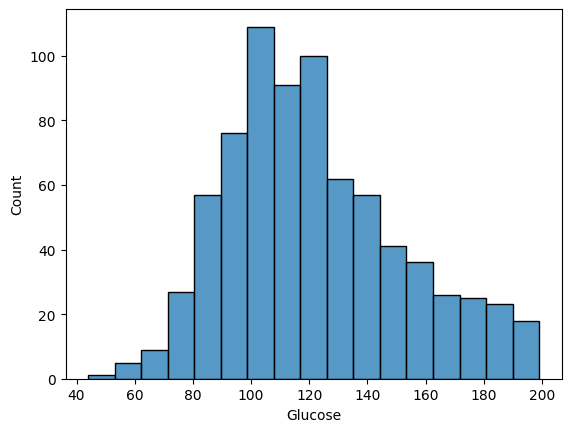

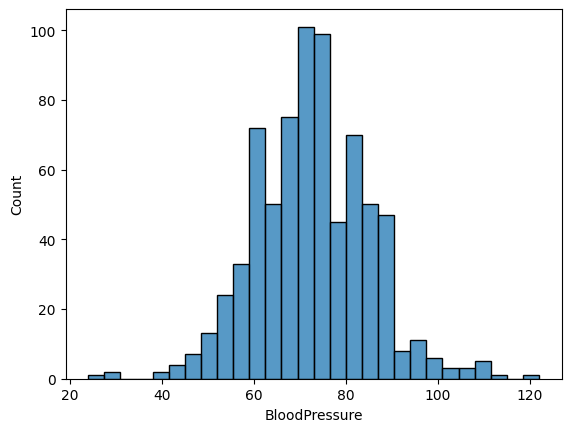

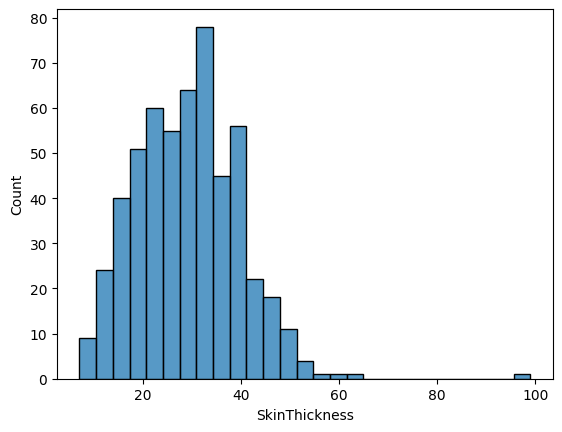

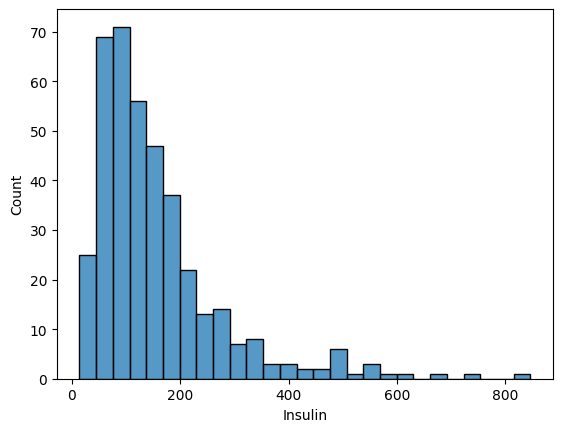

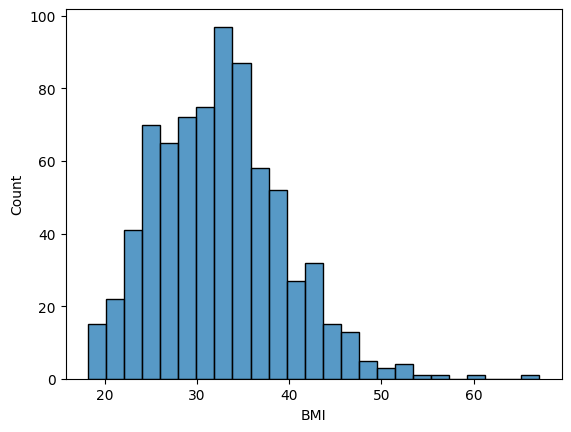

In [11]:
null_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for x in null_columns:
    sns.histplot(df[x])
    plt.show()


In [12]:
df["SkinThickness"][df["SkinThickness"].isnull()] = df["SkinThickness"].dropna().sample(df["SkinThickness"].isnull().sum(),random_state = 12345).values

In [13]:
df["Insulin"][df["Insulin"].isnull()] = df["Insulin"].dropna().sample(df["Insulin"].isnull().sum(),random_state = 12345).values

In [14]:
mean_col = ["Glucose","BloodPressure","BMI"]
for x in mean_col:
    df[x].fillna(df[x].mean(),inplace=True)

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

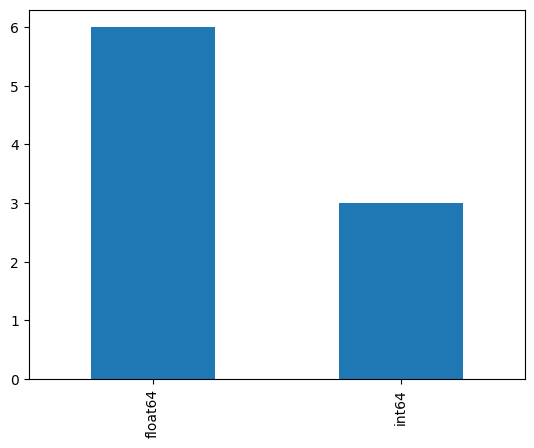

In [16]:
df.dtypes.value_counts().plot(kind = "bar")
plt.show()

In [17]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

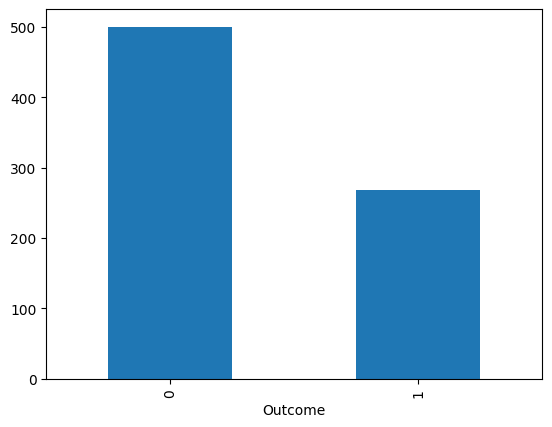

In [18]:
df["Outcome"].value_counts().plot(kind = "bar")
plt.show()

In [19]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [20]:
X.shape,y.shape

((768, 8), (768,))

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
X_resample, y_resample = SMOTE(random_state=108).fit_resample(X,y)

In [23]:
X_resample.shape, y_resample.shape

((1000, 8), (1000,))

In [24]:
y_resample.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

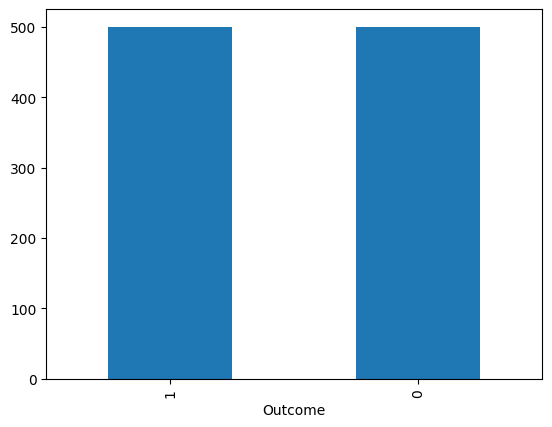

In [25]:
y_resample.value_counts().plot(kind = "bar")
plt.show()

In [26]:
df_new = pd.concat([X_resample,y_resample],axis = 1)

In [27]:
df_new.shape

(1000, 9)

<Figure size 1800x1500 with 0 Axes>

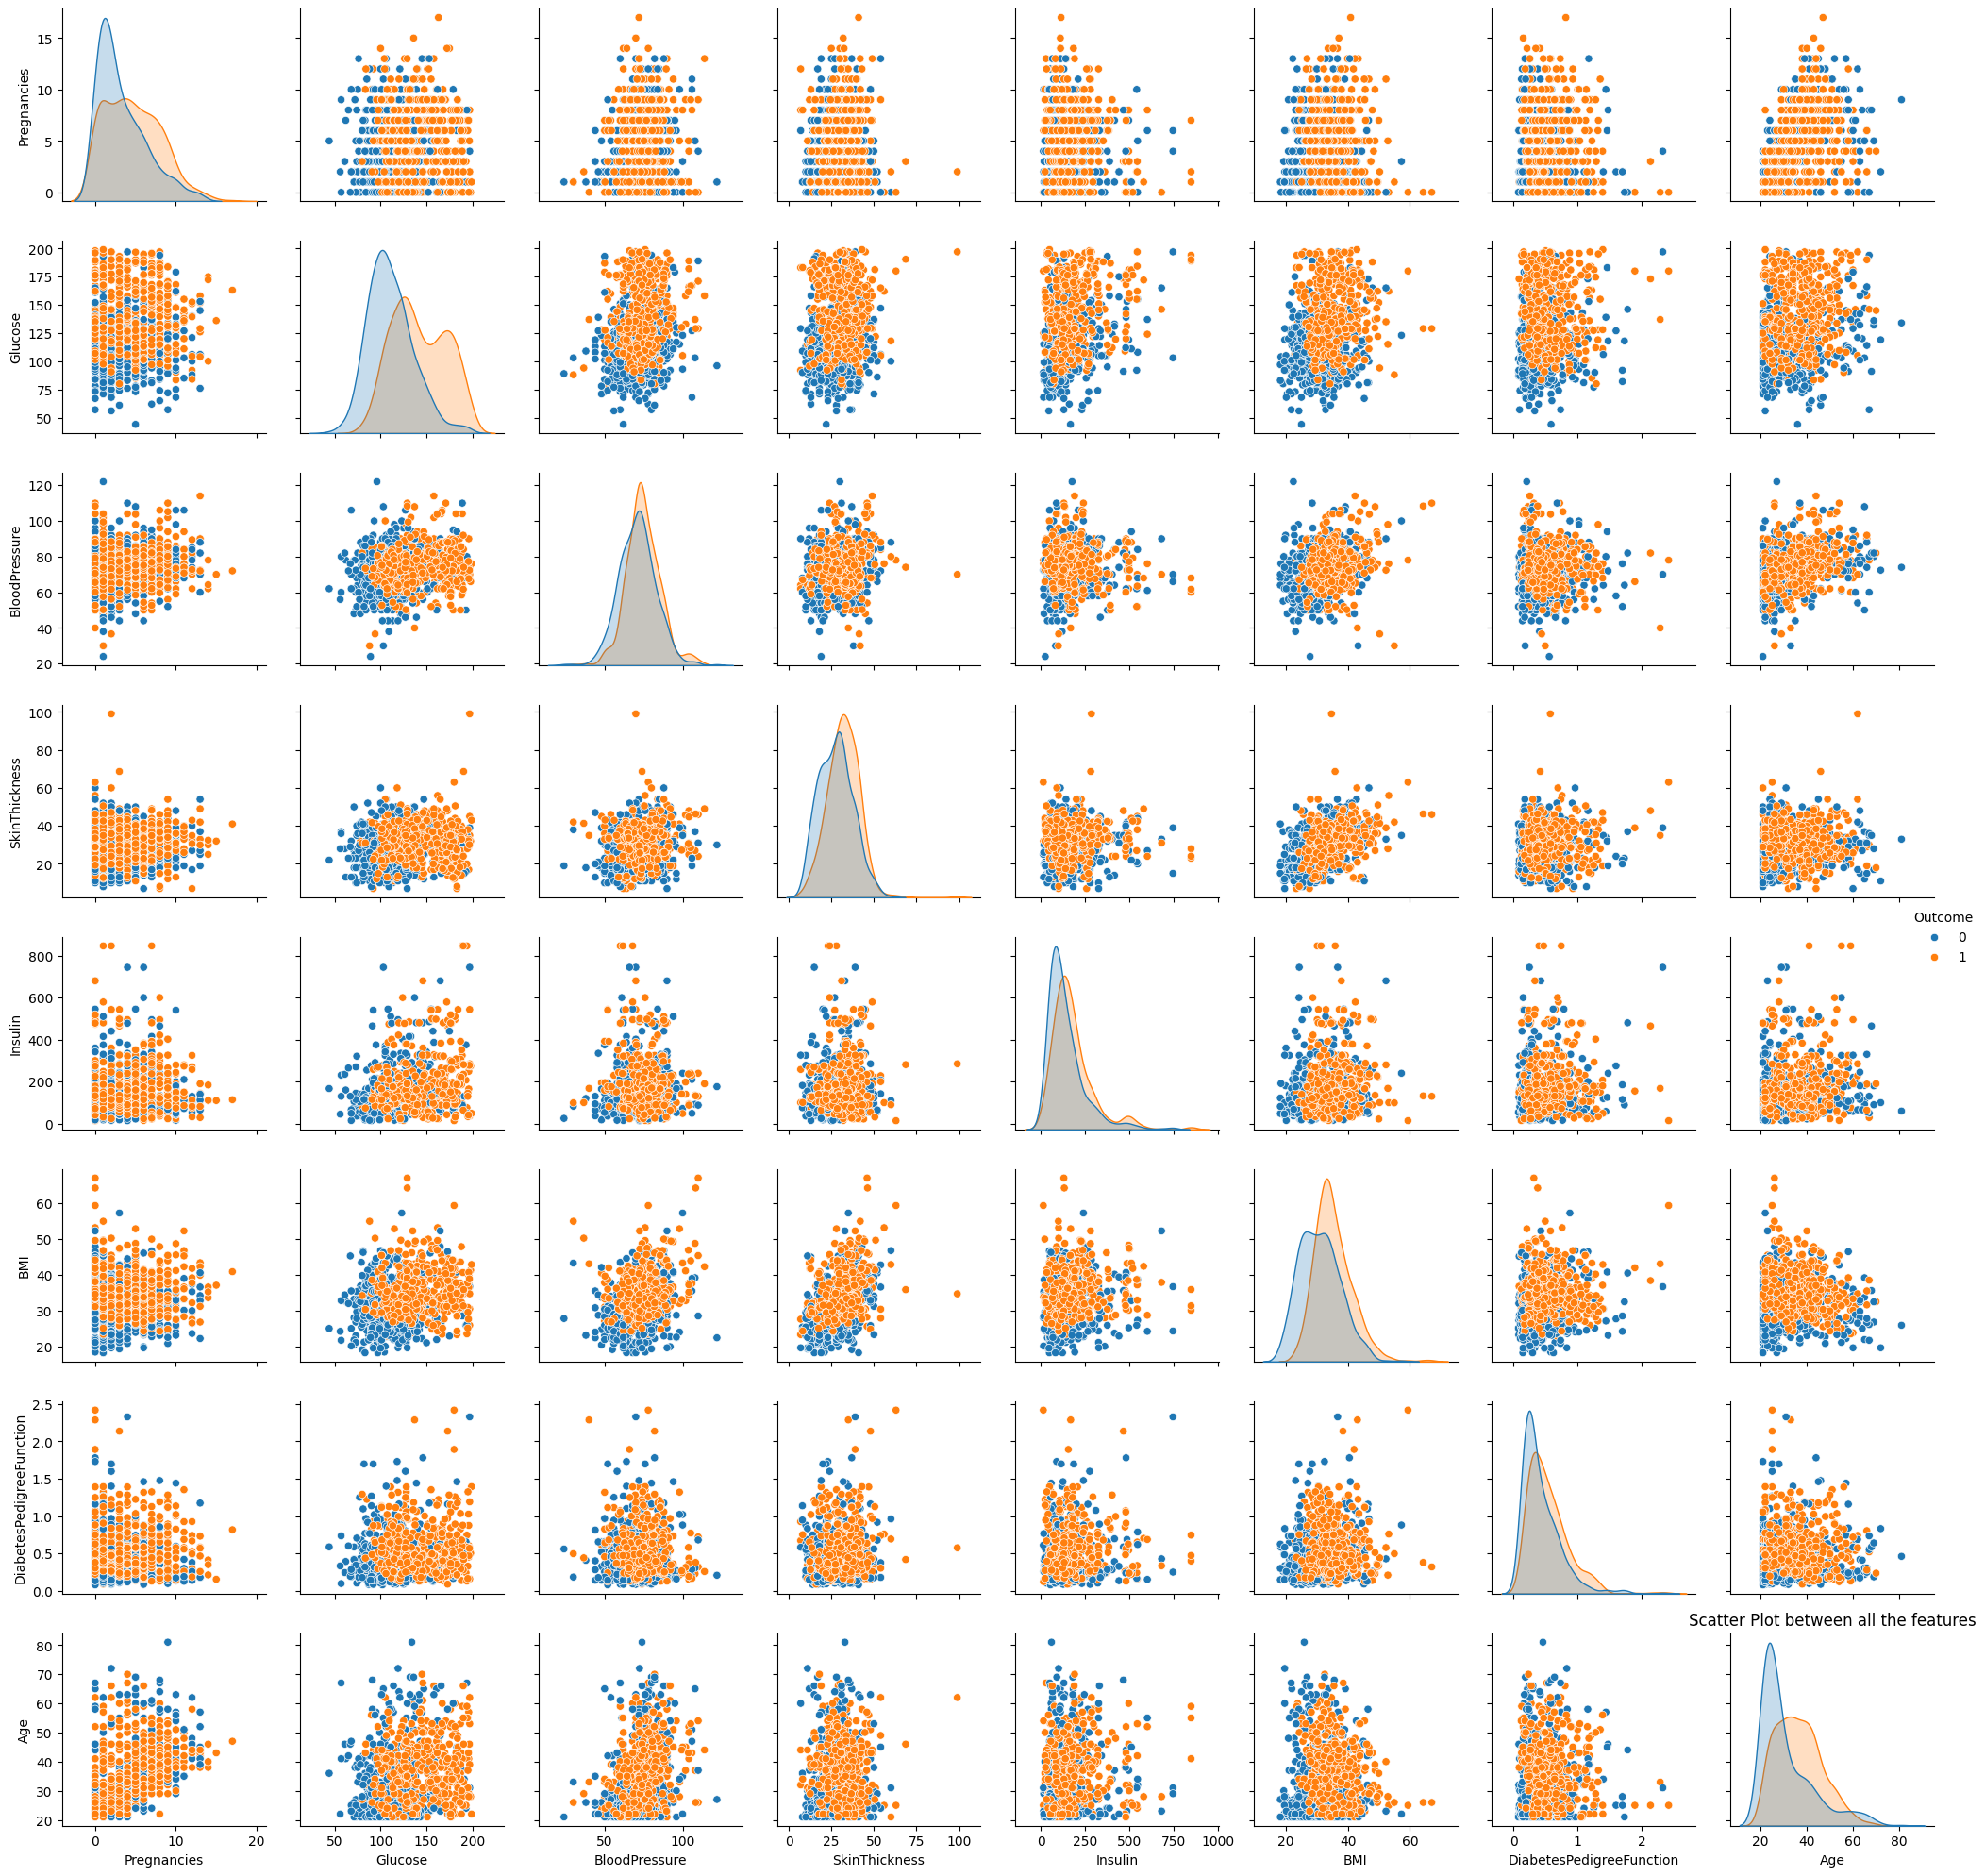

In [32]:
plt.figure(figsize=(18,15))
sns.pairplot(df_new,hue="Outcome")
plt.title("Scatter Plot between all the features")
plt.tight_layout()

In [30]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.116308,0.194147,0.079238,0.020985,0.018235,-0.016722,0.534123,0.210890
Glucose,0.116308,1.000000,0.221265,0.181597,0.325843,0.238409,0.133685,0.259308,0.502258
BloodPressure,0.194147,0.221265,1.000000,0.162288,0.045320,0.283344,-0.003977,0.334939,0.159506
SkinThickness,0.079238,0.181597,0.162288,1.000000,0.081382,0.470046,0.100965,0.096335,0.223871
Insulin,0.020985,0.325843,0.045320,0.081382,1.000000,0.152058,0.086236,0.126472,0.160500
BMI,0.018235,0.238409,0.283344,0.470046,0.152058,1.000000,0.136836,0.023129,0.330720
DiabetesPedigreeFunction,-0.016722,0.133685,-0.003977,0.100965,0.086236,0.136836,1.000000,0.018404,0.180917
Age,0.534123,0.259308,0.334939,0.096335,0.126472,0.023129,0.018404,1.000000,0.237777
Outcome,0.210890,0.502258,0.159506,0.223871,0.160500,0.330720,0.180917,0.237777,1.000000


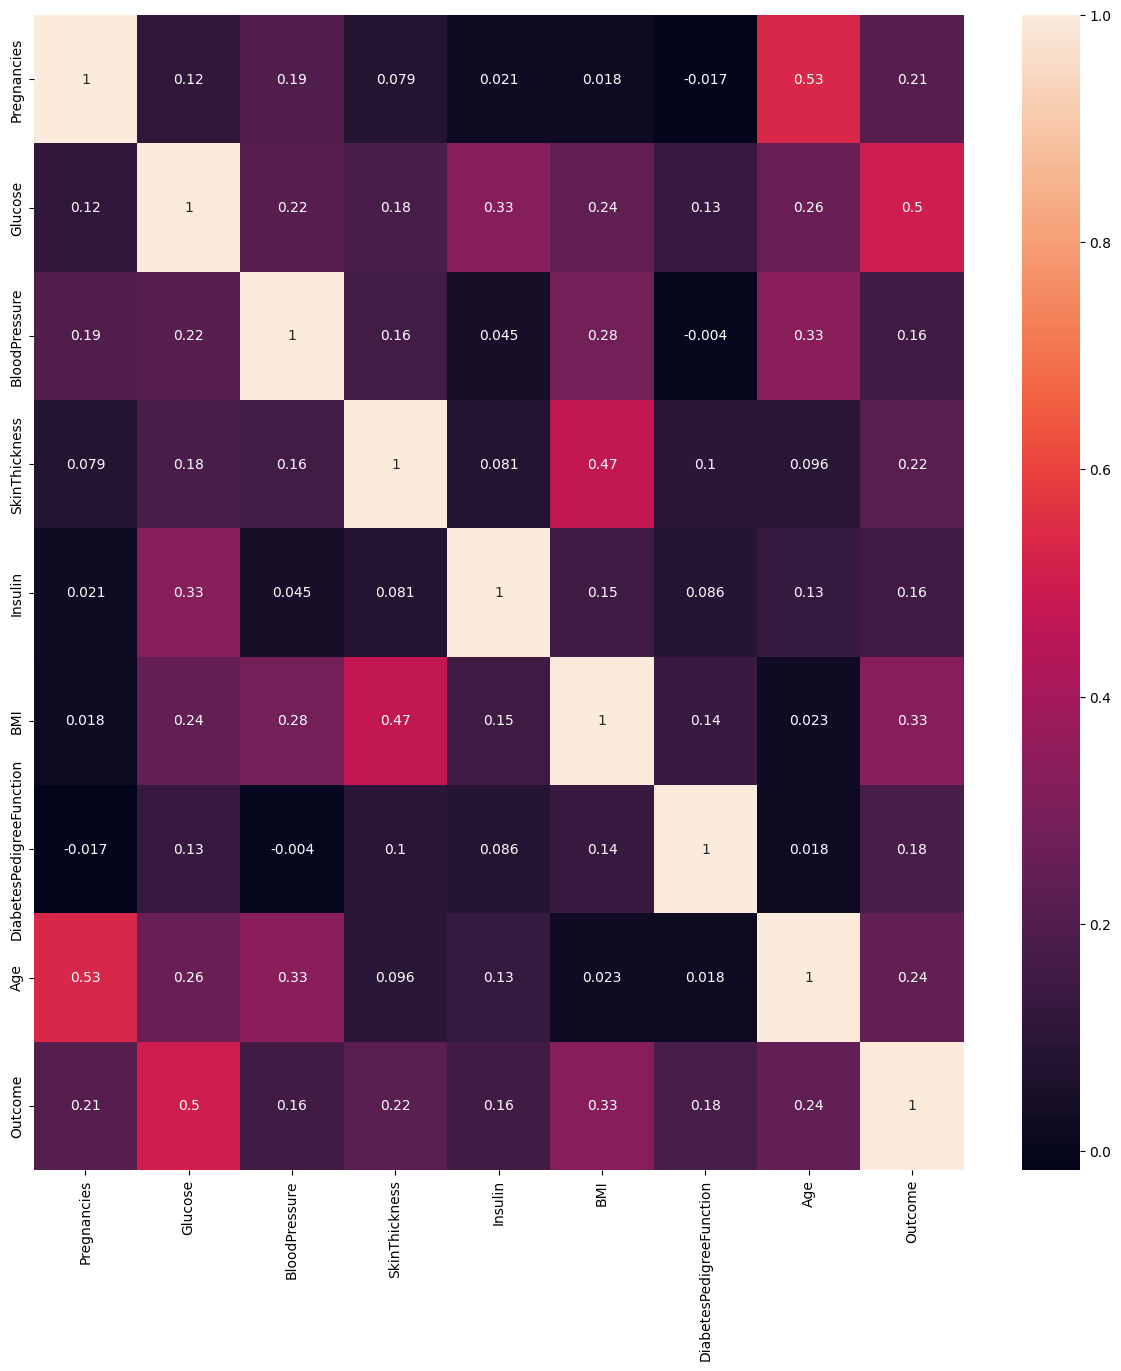

In [33]:
plt.figure(figsize = (15,15))
sns.heatmap(df_new.corr(),  annot=True)
plt.show()

In [34]:
#Performing Train - Test split on input data (To train and test model without Cross Validation and Hyper Parameter Tuning)

In [35]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold, GridSearchCV

In [36]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score, precision_recall_curve, average_precision_score

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [39]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [41]:
#1 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
params = {"C":np.logspace(-20,50,150),"penalty": ["l1","l2"],"max_iter":[100,300]}
lr = LogisticRegression()
grid = GridSearchCV(lr,param_grid=params,cv=10,verbose=0)

In [44]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-20, 2.94984134e-20, 8.70156393e-20, 2.56682330e-19,
       7.57172149e-19, 2.23353771e-18, 6.58858186e-18, 1.94352711e-17,
       5.73309663e-17, 1.69117254e-16, 4.98869069e-16, 1.47158460e-15,
       4.34094109e-15, 1.28050875e-14, 3.77729765e-14, 1.11424288e-13,
       3.28683970e-13, 9.69565562e-13, 2.86006...
       1.36216020e+40, 4.01815648e+40, 1.18529241e+41, 3.49642455e+41,
       1.03138977e+42, 3.04243618e+42, 8.97470401e+42, 2.64739529e+43,
       7.80939607e+43, 2.30364794e+44, 6.79539592e+44, 2.00453398e+45,
       5.91305720e+45, 1.74425806e+46, 5.14528453e+46, 1.51777730e+47,
       4.47720223e+47, 1.32070362e+48, 3.89586614e+48, 1.14921870e+49,
       3.39001283e+49, 1.00000000e+50]),
                         'max_iter': [100, 300], 'penalty': ['l1', 'l2']})

In [45]:
grid.best_params_

{'C': 0.18270270041765452, 'max_iter': 100, 'penalty': 'l2'}

In [47]:
lr_main = LogisticRegression(C = 0.18270270041765452, max_iter =  100)

In [48]:
lr_main.fit(X_train,y_train)

LogisticRegression(C=0.18270270041765452)

In [49]:
lr_main.score(X_test,y_test)

0.73

In [50]:
print(lr_main.classes_)
prob_pred = lr_main.predict_proba(X_test)
prob_predict = lr_main.predict_proba(X_test)
prob_pred

[0 1]


array([[0.62963886, 0.37036114],
       [0.87745569, 0.12254431],
       [0.11488174, 0.88511826],
       [0.15648208, 0.84351792],
       [0.70773705, 0.29226295],
       [0.55625829, 0.44374171],
       [0.84073099, 0.15926901],
       [0.89169319, 0.10830681],
       [0.30376531, 0.69623469],
       [0.83394208, 0.16605792],
       [0.28586984, 0.71413016],
       [0.92430346, 0.07569654],
       [0.79603058, 0.20396942],
       [0.10111637, 0.89888363],
       [0.28554582, 0.71445418],
       [0.21734982, 0.78265018],
       [0.5609799 , 0.4390201 ],
       [0.16743831, 0.83256169],
       [0.03223716, 0.96776284],
       [0.10941721, 0.89058279],
       [0.14287358, 0.85712642],
       [0.91891206, 0.08108794],
       [0.37236669, 0.62763331],
       [0.85594824, 0.14405176],
       [0.93007675, 0.06992325],
       [0.0631928 , 0.9368072 ],
       [0.56497191, 0.43502809],
       [0.11375251, 0.88624749],
       [0.6107885 , 0.3892115 ],
       [0.24733156, 0.75266844],
       [0.

In [51]:
prob_pred = prob_pred[:,1]

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

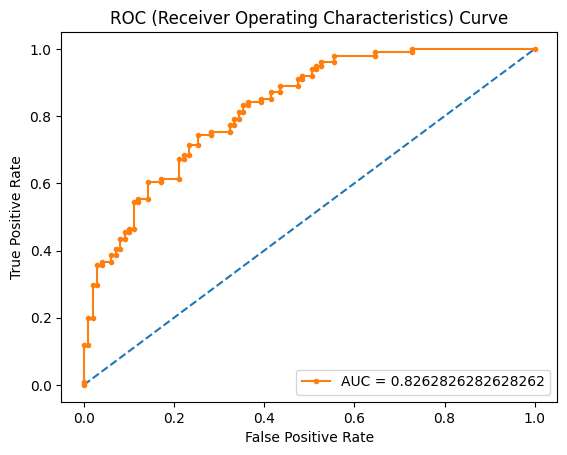

In [53]:
auc_lr = roc_auc_score(y_test,prob_pred)
fpr,tpr,thresholds = roc_curve(y_test,prob_pred)
plt.plot([0,1],[0,1],linestyle = "--")
plt.plot(fpr,tpr,marker = ".",label = f"AUC = {auc_lr}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

In [54]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_pred)

In [55]:
confusion_matrix(y_test, lr_main.predict(X_test))

array([[70, 29],
       [25, 76]])

In [56]:
y_pred = lr_main.predict(X_test)
f1 = f1_score(y_test, y_pred)

In [57]:
auc_lr_pr = auc(recall,precision)

auc_lr_pr

0.8232153969824741

In [58]:
avg_prec = average_precision_score(y_test,prob_pred)
avg_prec

0.8244396502336783

The f1_score, average precision score, AUC are 0.7378640776699029,0.8244396502336783,0.8232153969824741 respectively 


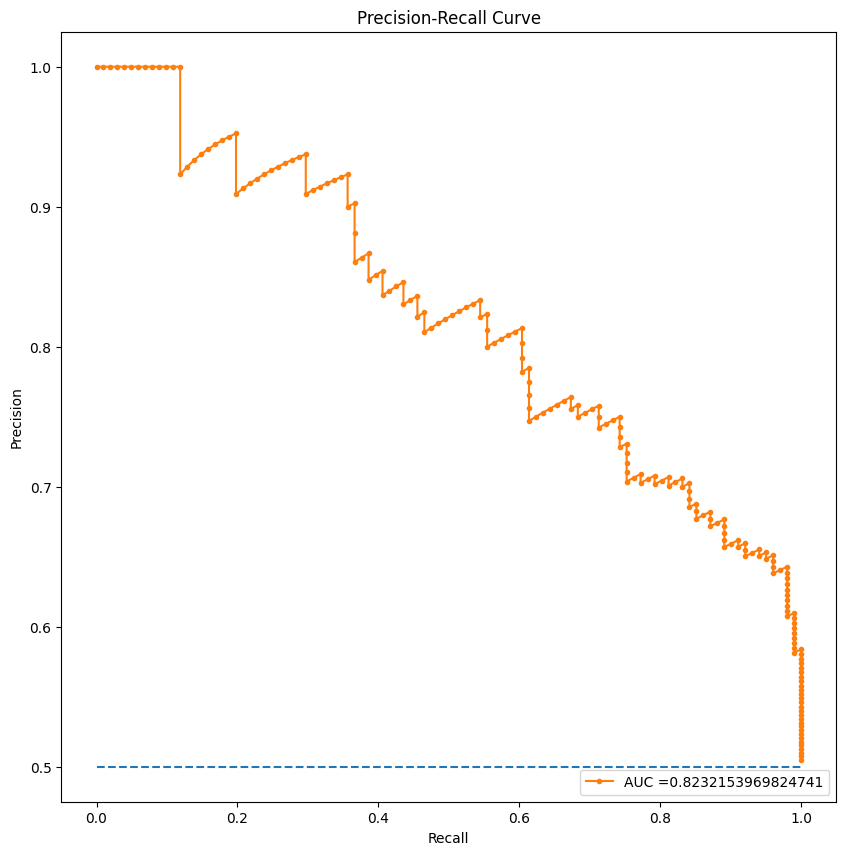

In [59]:
print(f"The f1_score, average precision score, AUC are {f1},{avg_prec},{auc_lr_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_lr_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [60]:
models.append("LR")
model_accuracy.append(accuracy_score(y_test,y_pred))
model_auc.append(auc_lr)
model_f1.append(f1)

In [61]:
# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()

In [63]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
print(dt1.score(X_train,y_train))
print(dt1.score(X_test,y_test))

1.0
0.74


In [65]:
params = {"criterion":["gini","entropy"],
'max_depth':[1,2,3,4,5,None]
}

In [66]:
grid_dt = GridSearchCV(dt1,param_grid=params,cv = 10, verbose=0)

In [67]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]})

In [68]:
dt2 = DecisionTreeClassifier(max_depth=5)

In [69]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [72]:
dt2.score(X_train,y_train)



0.74

In [73]:
dt2.score(X_test,y_test)

0.74

AUC: 0.7982798279827983


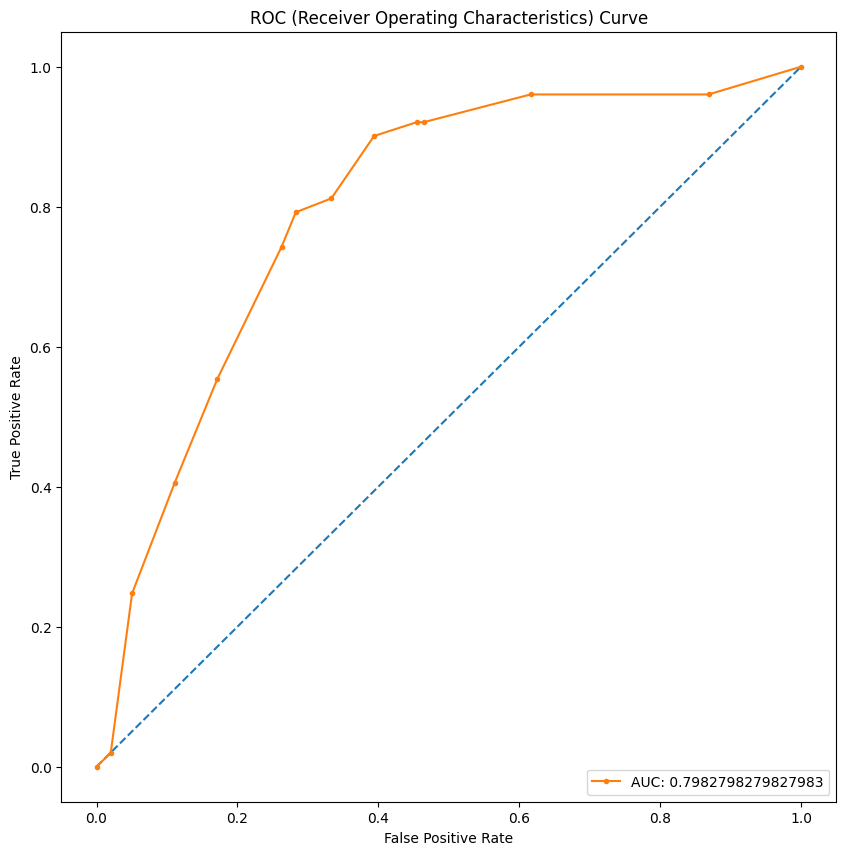

In [74]:
prob_dt = dt2.predict_proba(X_test)
prob_dt = prob_dt[:, 1]
auc_dt = roc_auc_score(y_test, prob_dt)
print(f"AUC: {auc_dt}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_dt)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_dt}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7425742574257425,0.7503213516878623,0.7257358156686134 respectively 


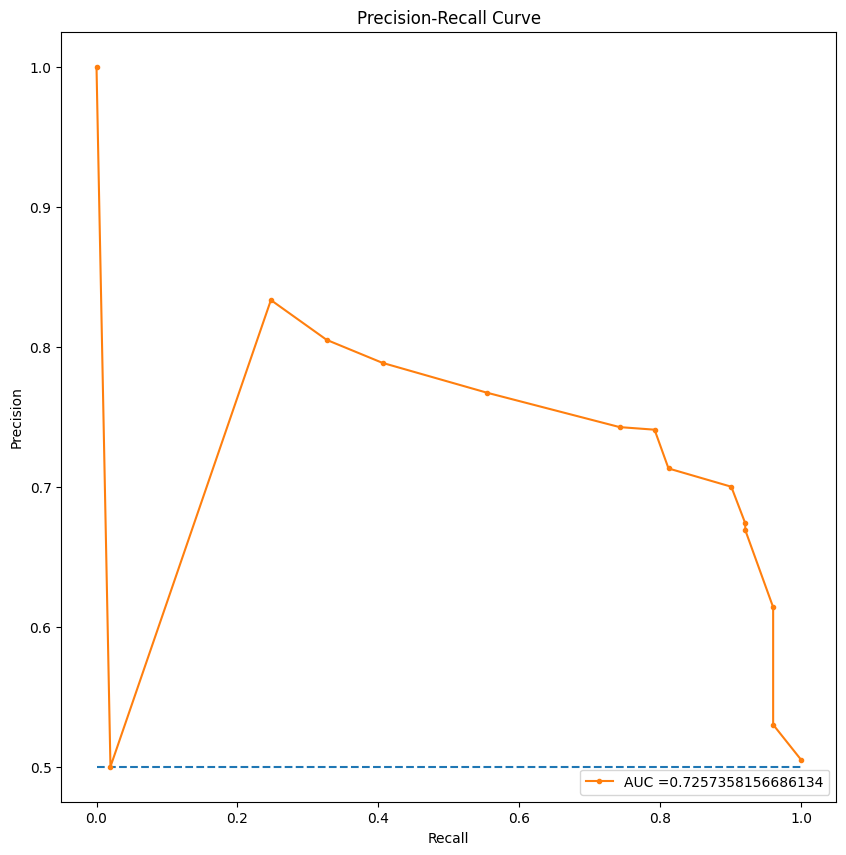

In [75]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_dt)
y_pred_dt = dt2.predict(X_test)
f2 = f1_score(y_test, y_pred_dt)
auc_dt_pr = auc(recall,precision)
avg_prec_dt = average_precision_score(y_test,prob_dt)
print(f"The f1_score, average precision score, AUC are {f2},{avg_prec_dt},{auc_dt_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_dt_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [76]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, y_pred_dt))
model_f1.append(f2)
model_auc.append(auc_dt)

In [77]:
#RandomForest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [80]:
rf1 = RandomForestClassifier()

In [81]:
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
rf1.score(X_train, y_train)

1.0

In [83]:
rf1.score(X_test, y_test)

0.8

In [84]:
params = {
'n_estimators': [50,100,150],
    "criterion" :["ginni","entropy"],
'max_depth': [None,1,3,5,7],
'min_samples_leaf': [1,3,5]
}

In [85]:
gs_rf = GridSearchCV(rf1, param_grid=params, cv=10, verbose=0)

In [88]:
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [89]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [90]:
rf2 = RandomForestClassifier(criterion =  'entropy',
 max_depth = None,
 min_samples_leaf= 3,
 n_estimators= 100)

In [91]:
rf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3)

In [92]:
rf2.score(X_train,y_train)

0.96875

In [93]:
rf2.score(X_test,y_test)


0.78

AUC: 0.8515851585158515


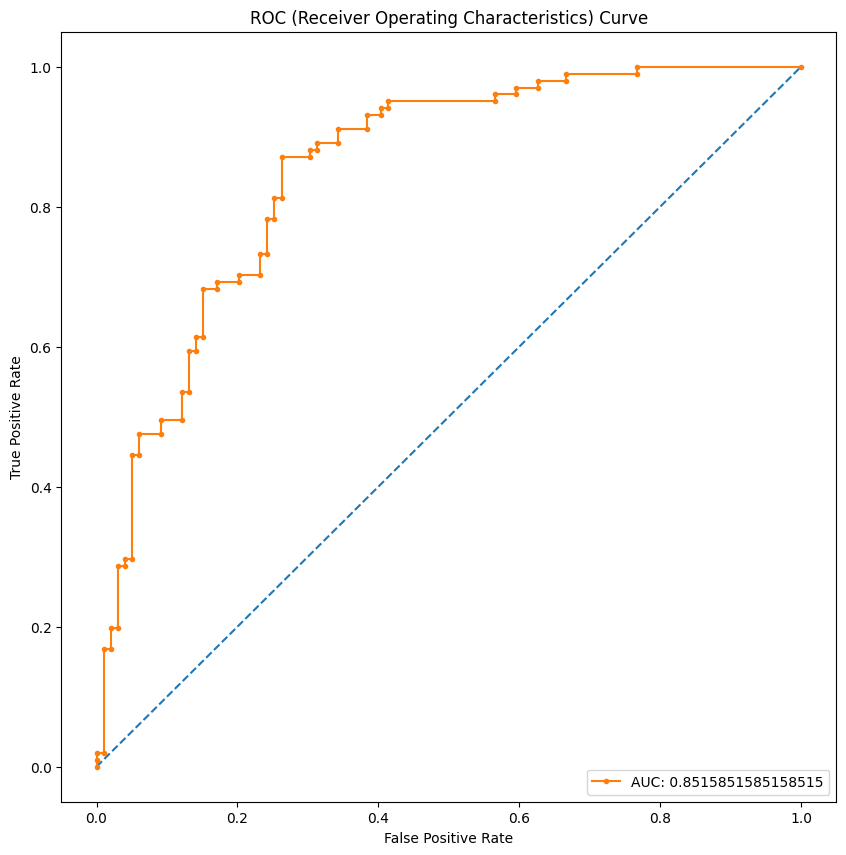

In [94]:
prob_rf = rf2.predict_proba(X_test)
prob_rf = prob_rf[:, 1]
auc_rf = roc_auc_score(y_test, prob_rf)
print(f"AUC: {auc_rf}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_rf)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_rf}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7904761904761906,0.8259998489197384,0.8234793789643566 respectively 


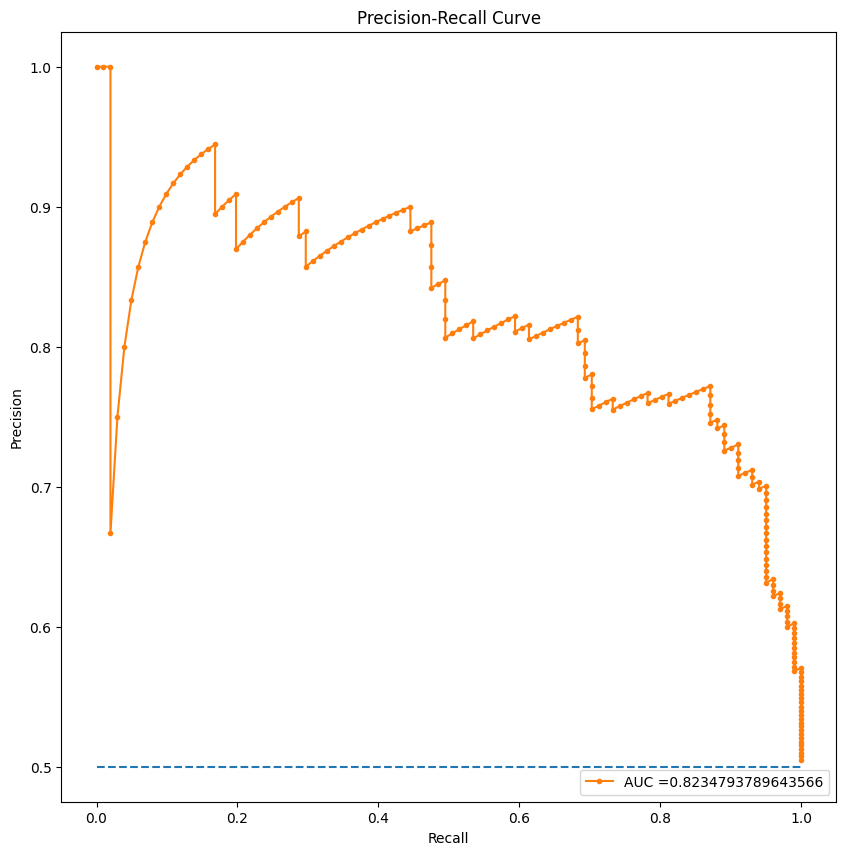

In [95]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_rf)
y_pred_rf = rf2.predict(X_test)
f3 = f1_score(y_test, y_pred_rf)
auc_rf_pr = auc(recall,precision)
avg_prec_rf = average_precision_score(y_test,prob_rf)
print(f"The f1_score, average precision score, AUC are {f3},{avg_prec_rf},{auc_rf_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_rf_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [96]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, y_pred_rf))
model_f1.append(f3)
model_auc.append(auc_rf)

In [97]:
# SVM

In [98]:
from sklearn.svm import SVC
svm1 = SVC()

In [99]:
svm1.fit(X_train, y_train)

SVC()

In [100]:
svm1.score(X_train, y_train)

0.74125

In [101]:
svm1.score(X_test, y_test)

0.725

In [102]:
params_svm = {
'C':[1, 5, 10, 15, 20, 25],
'gamma':["scale","auto"]
}

In [103]:
grid_svm = GridSearchCV(svm1,param_grid=params_svm,cv = 5, verbose=0)

In [104]:
grid_svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': ['scale', 'auto']})

In [105]:
grid_svm.best_params_

{'C': 25, 'gamma': 'scale'}

In [106]:
svm2 = SVC(C = 25, gamma = "scale", probability=True)

In [107]:
svm2.fit(X_train,y_train)

SVC(C=25, probability=True)

In [108]:
svm2.score(X_train,y_train)

0.77875

In [109]:
svm2.score(X_test,y_test)

0.705

AUC: 0.8092809280928092


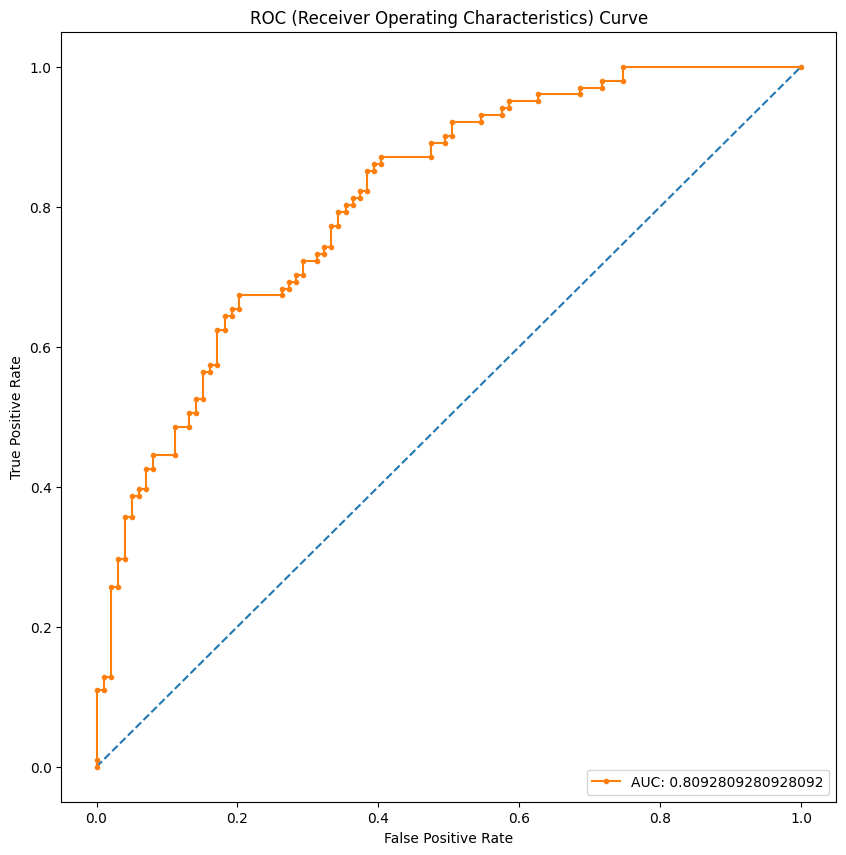

In [110]:
prob_svm = svm2.predict_proba(X_test)
prob_svm = prob_svm[:, 1]
auc_svm = roc_auc_score(y_test, prob_svm)
print(f"AUC: {auc_svm}" )
fpr, tpr, thresholds = roc_curve(y_test, prob_svm)
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = f"AUC: {auc_svm}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")
plt.legend(loc = "lower right")
plt.show()

The f1_score, average precision score, AUC are 0.7064676616915423,0.8084593851762943,0.8070479564443822 respectively 


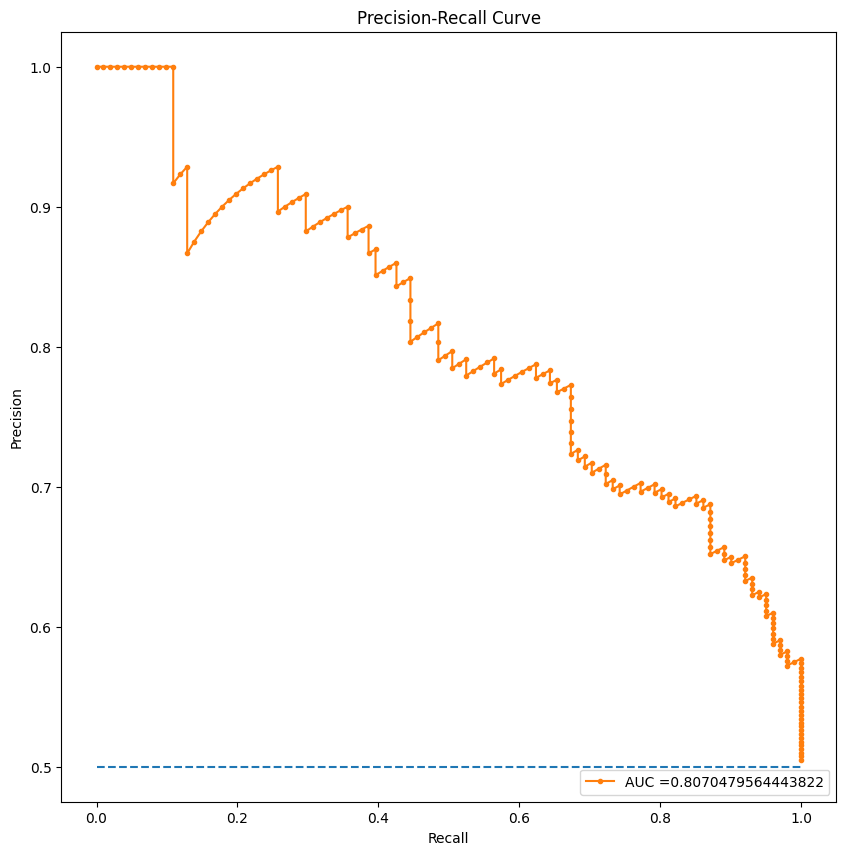

In [111]:
precision, recall, thresholds = precision_recall_curve(y_test,prob_svm)
y_pred_svm = svm2.predict(X_test)
f4 = f1_score(y_test, y_pred_svm)
auc_svm_pr = auc(recall,precision)
avg_prec_svm = average_precision_score(y_test,prob_svm)
print(f"The f1_score, average precision score, AUC are {f4},{avg_prec_svm},{auc_svm_pr} respectively " )
plt.figure(figsize=(10,10))
plt.plot([0,1],[0.5,0.5],linestyle = "--")
plt.plot(recall, precision, marker = ".", label = f"AUC ={auc_svm_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc = "lower right")
plt.show()

In [112]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test,y_pred_svm))
model_f1.append(f4)
model_auc.append(auc_svm)

In [113]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = [["model","model_accuracy","model_f1","model_auc"]])
model_summary = model_summary.set_index('model')

In [114]:
model_summary

,model_accuracy,model_f1,model_auc
model,,,
"(LR,)",0.730,0.737864,0.826283
"(DT,)",0.740,0.742574,0.798280
"(RF,)",0.780,0.790476,0.851585
"(SVM,)",0.705,0.706468,0.809281


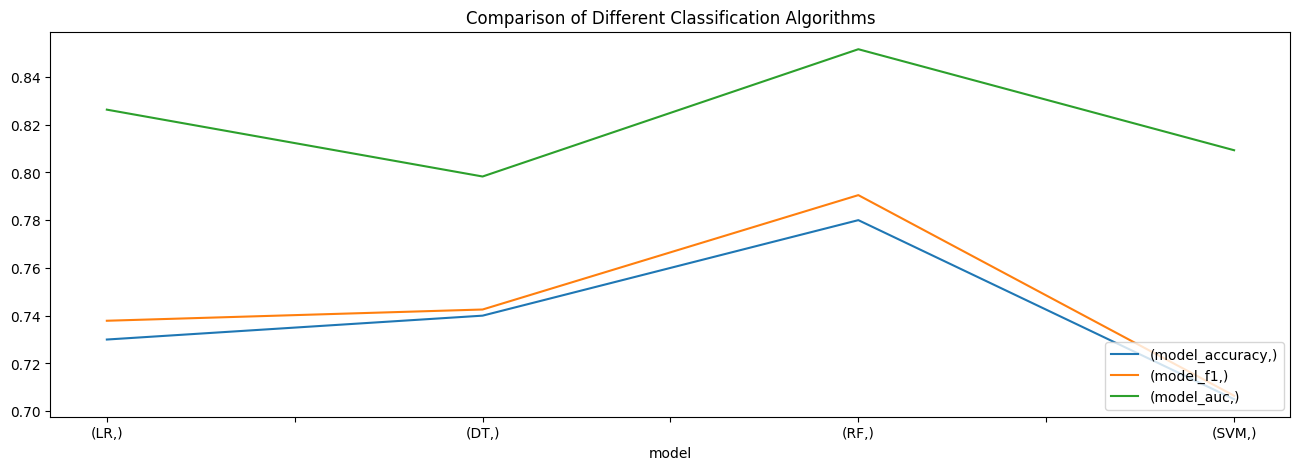

In [115]:
model_summary.plot(figsize=(16,5), label = f"Comparision values")
plt.title("Comparison of Different Classification Algorithms")
plt.legend(loc = "lower right")
plt.show()


In [116]:
#Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.

In [117]:
final_model = rf2

In [118]:
from sklearn.metrics import classification_report

In [119]:
report = classification_report(y_test,final_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.76      0.82      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [120]:
print(confusion_matrix(y_test,final_model.predict(X_test)))

[[73 26]
 [18 83]]


In [121]:
print(f"Accuracy Score is:{accuracy_score(y_test,final_model.predict(X_test))}")
print(f"Precision Score is:{precision_score(y_test,final_model.predict(X_test))}")
print(f"Recall Score is:{recall_score(y_test,final_model.predict(X_test))}")
print(f"Average Precision Score is:{average_precision_score(y_test,final_model.predict(X_test))}")
print(f"f1Score is:{f1_score(y_test,final_model.predict(X_test))}")
print(f"AUC is:{roc_auc_score(y_test, prob_rf)}")

Accuracy Score is:0.78
Precision Score is:0.7614678899082569
Recall Score is:0.8217821782178217
Average Precision Score is:0.7157607412117359
f1Score is:0.7904761904761906
AUC is:0.8515851585158515
